# Case Study - Diamond Price Prediction

### Problem Statement - The aim here will be to predict the cost of Diamond based on the given features in the dataset

### Business Understanding

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

#### Understanding the 4 C's
+ Cut
+ Color
+ Clarity
+ Carat

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\k.udaya shree\Downloads\diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.cut.nunique()

5

In [8]:
df.color.nunique()

7

In [9]:
df.clarity.nunique()

8

<AxesSubplot:xlabel='carat'>

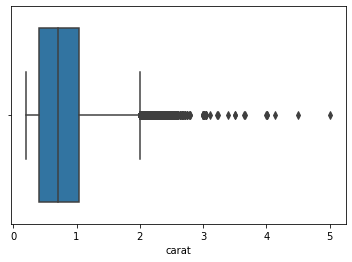

In [10]:
sns.boxplot(df['carat'])

<AxesSubplot:xlabel='depth'>

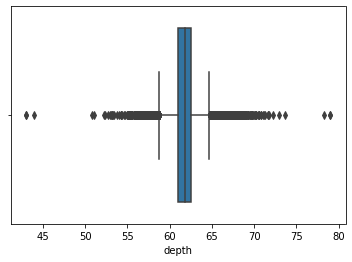

In [11]:
sns.boxplot(df['depth'])

<AxesSubplot:xlabel='table'>

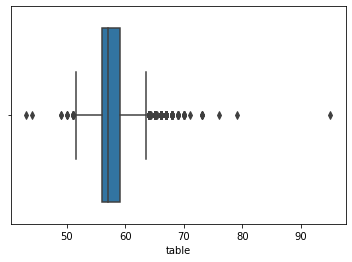

In [12]:
sns.boxplot(df['table'])

<AxesSubplot:xlabel='price'>

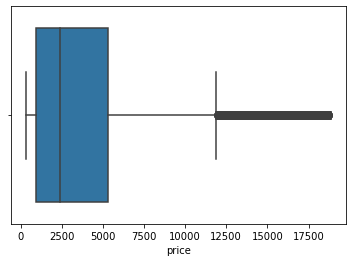

In [13]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='x'>

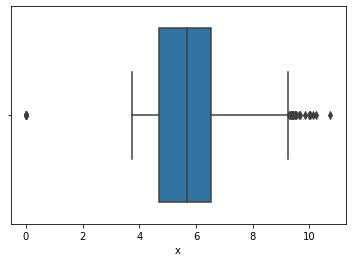

In [14]:
sns.boxplot(df['x'])

<AxesSubplot:xlabel='y'>

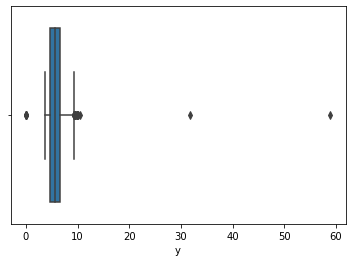

In [15]:
sns.boxplot(df['y'])

<AxesSubplot:xlabel='z'>

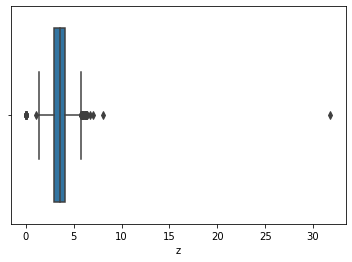

In [16]:
sns.boxplot(df['z'])

In [17]:
percentile25 = df['carat'].quantile(0.25)
percentile75 = df['carat'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

0.64
Upper limit 2.0
Lower limit -0.5599999999999999


In [18]:
df[df['carat'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


In [19]:
df[df['carat'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [20]:
new_df = df.copy()

new_df['carat'] = np.where(new_df['carat'] > upper_limit, upper_limit, 
                                np.where(new_df['carat'] < lower_limit, lower_limit,
                                         new_df['carat']))

In [21]:
new_df.shape

(53940, 10)

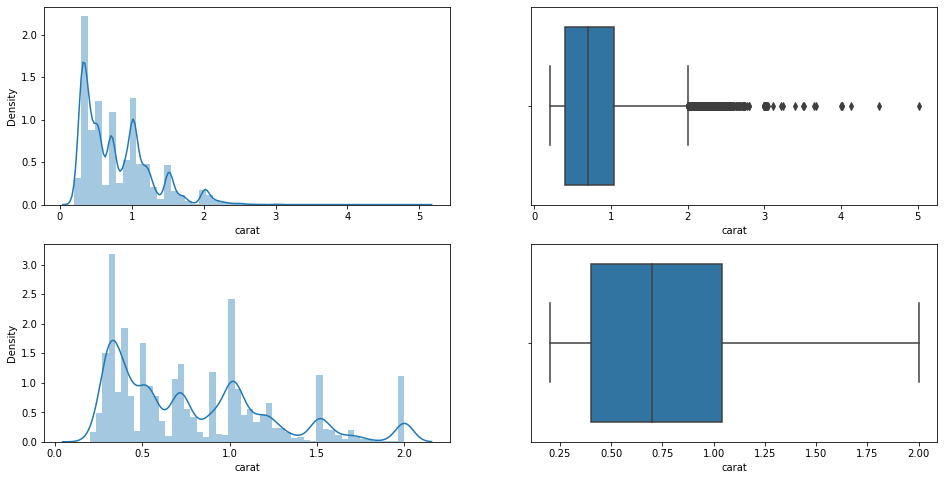

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['carat'])

plt.subplot(2,2,2)
sns.boxplot(df['carat'])

plt.subplot(2,2,3)
sns.distplot(new_df['carat'])

plt.subplot(2,2,4)
sns.boxplot(new_df['carat'])

plt.show()

In [23]:
percentile25 = new_df['depth'].quantile(0.25)
percentile75 = new_df['depth'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

1.5
Upper limit 64.75
Lower limit 58.75


In [24]:
new_df[new_df['depth'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
124,0.70,Fair,F,VS2,65.3,55.0,2762,5.63,5.58,3.66
129,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95
...,...,...,...,...,...,...,...,...,...,...
53727,0.78,Fair,E,SI2,66.9,57.0,2721,5.70,5.66,3.60
53800,0.90,Fair,I,VS1,68.7,62.0,2732,5.83,5.79,3.99
53863,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13
53879,1.04,Fair,G,SI2,65.2,57.0,2745,6.25,6.23,4.07


In [25]:
new_df[new_df['depth'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
43,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46
84,0.26,Good,E,VVS1,57.9,60.0,554,4.22,4.25,2.45
...,...,...,...,...,...,...,...,...,...,...
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


In [26]:
new_df1 = new_df.copy()

new_df1['depth'] = np.where(new_df1['depth'] > upper_limit, upper_limit, 
                                np.where(new_df1['depth'] < lower_limit, lower_limit,
                                         new_df1['depth']))

In [27]:
new_df1.shape

(53940, 10)

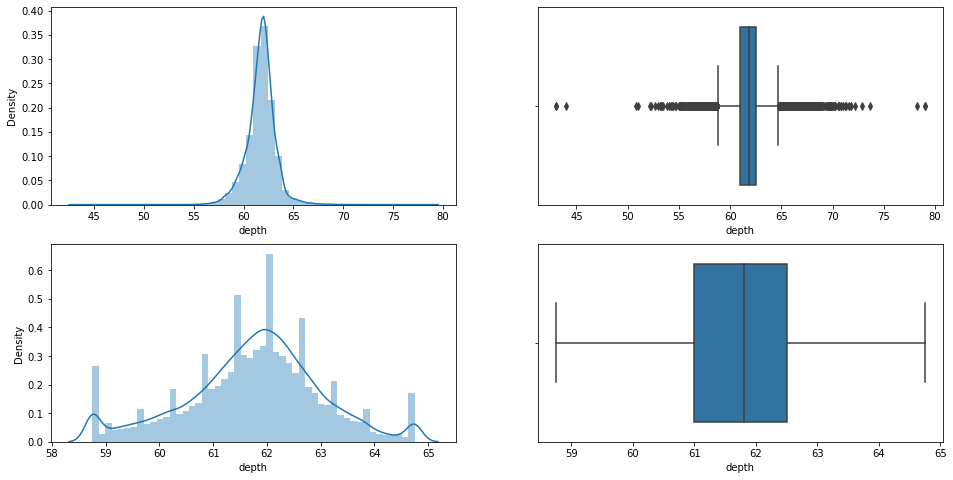

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['depth'])

plt.subplot(2,2,2)
sns.boxplot(new_df['depth'])

plt.subplot(2,2,3)
sns.distplot(new_df1['depth'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['depth'])

plt.show()

In [29]:
percentile25 = new_df1['table'].quantile(0.25)
percentile75 = new_df1['table'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

3.0
Upper limit 63.5
Lower limit 51.5


In [30]:
new_df1[new_df1['table'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,58.75,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,58.75,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.10,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,58.75,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,58.75,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.70,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.50,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,58.75,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,58.75,64.0,2724,6.06,5.97,3.34


In [31]:
new_df1[new_df1['table'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
1515,0.91,Fair,F,SI2,64.75,51.0,2996,6.05,5.98,3.93
3238,0.94,Fair,H,SI2,64.75,50.1,3353,6.13,6.17,4.06
3979,1.00,Premium,H,SI1,62.20,51.0,3511,6.47,6.40,4.00
4150,0.91,Premium,F,SI2,61.00,51.0,3546,6.24,6.21,3.80
5979,1.00,Fair,I,VS1,64.00,49.0,3951,6.43,6.39,4.10
7418,1.02,Fair,F,SI1,61.80,50.0,4227,6.59,6.51,4.05
8853,1.00,Fair,E,VS2,64.75,51.0,4480,6.31,6.22,4.16
11368,1.04,Ideal,I,VS1,62.90,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.50,49.0,630,4.28,4.25,2.75
25179,2.00,Fair,H,SI1,61.20,50.0,13764,8.17,8.08,4.97


In [32]:
new_df2 = new_df1.copy()

new_df2['table'] = np.where(new_df2['table'] > upper_limit, upper_limit, 
                                np.where(new_df2['table'] < lower_limit, lower_limit,
                                         new_df2['table']))

In [33]:
new_df2.shape

(53940, 10)

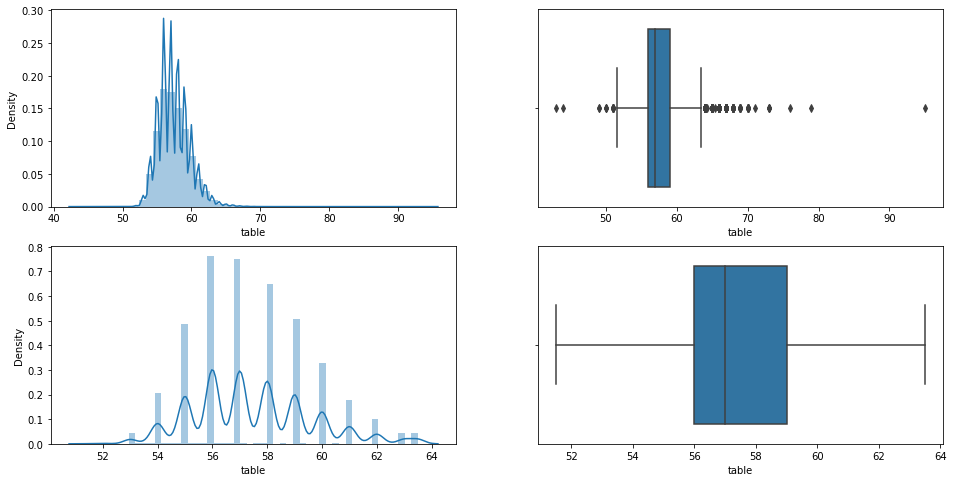

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df1['table'])

plt.subplot(2,2,2)
sns.boxplot(new_df1['table'])

plt.subplot(2,2,3)
sns.distplot(new_df2['table'])

plt.subplot(2,2,4)
sns.boxplot(new_df2['table'])

plt.show()

In [35]:
percentile25 = new_df2['price'].quantile(0.25)
percentile75 = new_df2['price'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

4374.25
Upper limit 11885.625
Lower limit -5611.375


In [36]:
new_df2[new_df2['price'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.00,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.00,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [37]:
new_df2[new_df2['price'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [38]:
new_df3 = new_df2.copy()

new_df3['price'] = np.where(new_df3['price'] > upper_limit, upper_limit, 
                                np.where(new_df3['price'] < lower_limit, lower_limit,
                                         new_df3['price']))

In [39]:
new_df3.shape

(53940, 10)

<AxesSubplot:xlabel='price'>

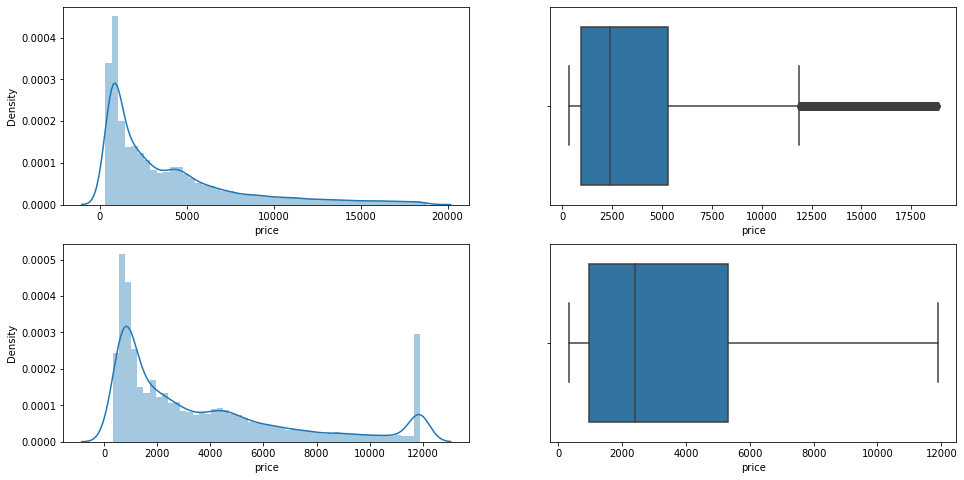

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df2['price'])

plt.subplot(2,2,2)
sns.boxplot(new_df2['price'])

plt.subplot(2,2,3)
sns.distplot(new_df3['price'])

plt.subplot(2,2,4)
sns.boxplot(new_df3['price'])

In [41]:
percentile25 = new_df3['x'].quantile(0.25)
percentile75 = new_df3['x'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

1.83
Upper limit 9.285
Lower limit 1.9649999999999999


In [42]:
new_df3[new_df3['x'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
22741,2.0,Fair,H,I1,58.75,62.0,10761.000,9.54,9.38,5.31
22831,2.0,Good,I,I1,58.75,63.5,10863.000,9.38,9.31,5.33
23644,2.0,Fair,H,I1,64.75,53.0,11668.000,9.53,9.48,6.38
24131,2.0,Premium,H,I1,62.10,58.0,11885.625,9.44,9.40,5.85
24297,2.0,Ideal,I,I1,62.60,55.0,11885.625,9.49,9.42,5.92
24328,2.0,Ideal,H,I1,62.80,57.0,11885.625,9.65,9.59,6.03
24816,2.0,Premium,G,I1,59.70,60.0,11885.625,9.42,9.26,5.58
25460,2.0,Premium,G,SI2,59.80,58.0,11885.625,9.44,9.37,5.62
25850,2.0,Good,J,SI2,59.30,63.5,11885.625,9.32,9.19,5.50
25998,2.0,Premium,I,I1,61.00,61.0,11885.625,10.14,10.10,6.17


In [43]:
new_df3[new_df3['x'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.60,56.0,4954.000,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.30,53.0,5139.000,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,58.75,63.5,6381.000,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.20,54.0,11885.625,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.10,59.0,11885.625,0.0,0.00,0.0
27429,2.00,Premium,H,SI2,62.80,59.0,11885.625,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.10,60.0,2130.000,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.10,60.0,2130.000,0.0,0.00,0.0


In [44]:
new_df4 = new_df3.copy()

new_df4['x'] = np.where(new_df4['x'] > upper_limit, upper_limit, 
                                np.where(new_df4['x'] < lower_limit, lower_limit,
                                         new_df4['x']))

In [45]:
new_df4.shape

(53940, 10)

<AxesSubplot:xlabel='x'>

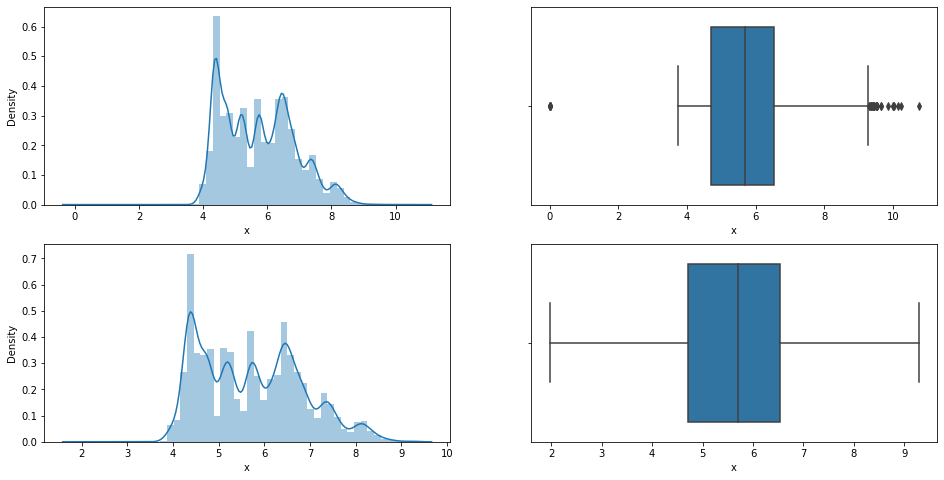

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df3['x'])

plt.subplot(2,2,2)
sns.boxplot(new_df3['x'])

plt.subplot(2,2,3)
sns.distplot(new_df4['x'])

plt.subplot(2,2,4)
sns.boxplot(new_df4['x'])

In [47]:
percentile25 = new_df4['y'].quantile(0.25)
percentile75 = new_df4['y'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

1.8200000000000003
Upper limit 9.27
Lower limit 1.9899999999999993


In [48]:
new_df4[new_df4['y'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
22741,2.00,Fair,H,I1,58.75,62.0,10761.000,9.285,9.38,5.31
22831,2.00,Good,I,I1,58.75,63.5,10863.000,9.285,9.31,5.33
23644,2.00,Fair,H,I1,64.75,53.0,11668.000,9.285,9.48,6.38
24067,2.00,Premium,H,SI2,58.90,57.0,11885.625,8.090,58.90,8.06
24131,2.00,Premium,H,I1,62.10,58.0,11885.625,9.285,9.40,5.85
24297,2.00,Ideal,I,I1,62.60,55.0,11885.625,9.285,9.42,5.92
24328,2.00,Ideal,H,I1,62.80,57.0,11885.625,9.285,9.59,6.03
25460,2.00,Premium,G,SI2,59.80,58.0,11885.625,9.285,9.37,5.62
25998,2.00,Premium,I,I1,61.00,61.0,11885.625,9.285,10.10,6.17
25999,2.00,Premium,J,I1,62.50,62.0,11885.625,9.285,9.94,6.24


In [49]:
new_df4[new_df4['y'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.30,53.0,5139.000,1.965,0.0,0.0
15951,1.14,Fair,G,VS1,58.75,63.5,6381.000,1.965,0.0,0.0
24520,1.56,Ideal,G,VS2,62.20,54.0,11885.625,1.965,0.0,0.0
26243,1.20,Premium,D,VVS1,62.10,59.0,11885.625,1.965,0.0,0.0
27429,2.00,Premium,H,SI2,62.80,59.0,11885.625,1.965,0.0,0.0
49556,0.71,Good,F,SI2,64.10,60.0,2130.000,1.965,0.0,0.0
49557,0.71,Good,F,SI2,64.10,60.0,2130.000,1.965,0.0,0.0


In [50]:
new_df5 = new_df4.copy()

new_df5['y'] = np.where(new_df5['y'] > upper_limit, upper_limit, 
                                np.where(new_df5['y'] < lower_limit, lower_limit,
                                         new_df5['y']))

In [51]:
new_df5.shape

(53940, 10)

<AxesSubplot:xlabel='y'>

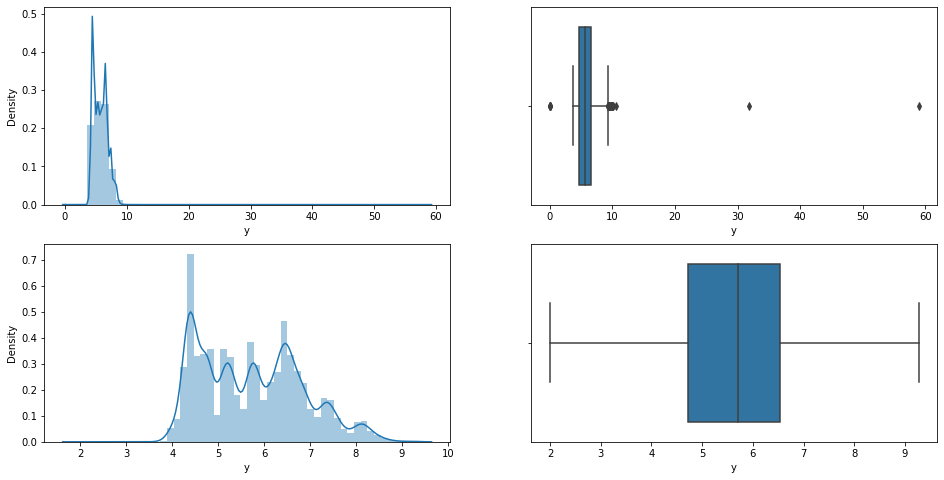

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df4['y'])

plt.subplot(2,2,2)
sns.boxplot(new_df4['y'])

plt.subplot(2,2,3)
sns.distplot(new_df5['y'])

plt.subplot(2,2,4)
sns.boxplot(new_df5['y'])

In [53]:
percentile25 = new_df5['z'].quantile(0.25)
percentile75 = new_df5['z'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

1.13
Upper limit 5.734999999999999
Lower limit 1.2150000000000003


In [54]:
new_df5[new_df5['z'] > upper_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
16283,2.00,Very Good,H,I1,63.10,55.0,6512.000,9.230,9.10,5.77
17196,2.00,Fair,J,I1,64.75,56.0,6870.000,8.460,8.43,5.76
19346,2.00,Fair,H,I1,64.75,57.0,8044.000,8.930,8.84,5.97
21758,2.00,Fair,J,I1,64.75,57.0,9823.000,9.150,9.02,5.98
22540,2.00,Fair,I,I1,64.75,56.0,10577.000,9.110,9.02,5.91
23539,2.00,Good,E,I1,64.20,63.5,11548.000,9.080,8.96,5.79
23644,2.00,Fair,H,I1,64.75,53.0,11668.000,9.285,9.27,6.38
24067,2.00,Premium,H,SI2,58.90,57.0,11885.625,8.090,9.27,8.06
24131,2.00,Premium,H,I1,62.10,58.0,11885.625,9.285,9.27,5.85
24297,2.00,Ideal,I,I1,62.60,55.0,11885.625,9.285,9.27,5.92


In [55]:
new_df5[new_df5['z'] < lower_limit]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.10,59.0,3142.000,6.550,6.48,0.00
2314,1.01,Premium,H,I1,58.75,59.0,3167.000,6.660,6.60,0.00
4791,1.10,Premium,G,SI2,63.00,59.0,3696.000,6.500,6.47,0.00
5471,1.01,Premium,F,SI2,59.20,58.0,3837.000,6.500,6.47,0.00
10167,1.50,Good,G,I1,64.00,61.0,4731.000,7.150,7.04,0.00
11182,1.07,Ideal,F,SI2,61.60,56.0,4954.000,1.965,6.62,0.00
11963,1.00,Very Good,H,VS2,63.30,53.0,5139.000,1.965,1.99,0.00
13601,1.15,Ideal,G,VS2,59.20,56.0,5564.000,6.880,6.83,0.00
14635,1.07,Ideal,F,SI1,60.60,57.0,5909.000,6.620,6.67,1.07
15951,1.14,Fair,G,VS1,58.75,63.5,6381.000,1.965,1.99,0.00


In [56]:
new_data = new_df5.copy()

new_data['z'] = np.where(new_data['z'] > upper_limit, upper_limit, 
                                np.where(new_data['z'] < lower_limit, lower_limit,
                                         new_data['z']))

In [57]:
new_data.shape

(53940, 10)

<AxesSubplot:xlabel='z'>

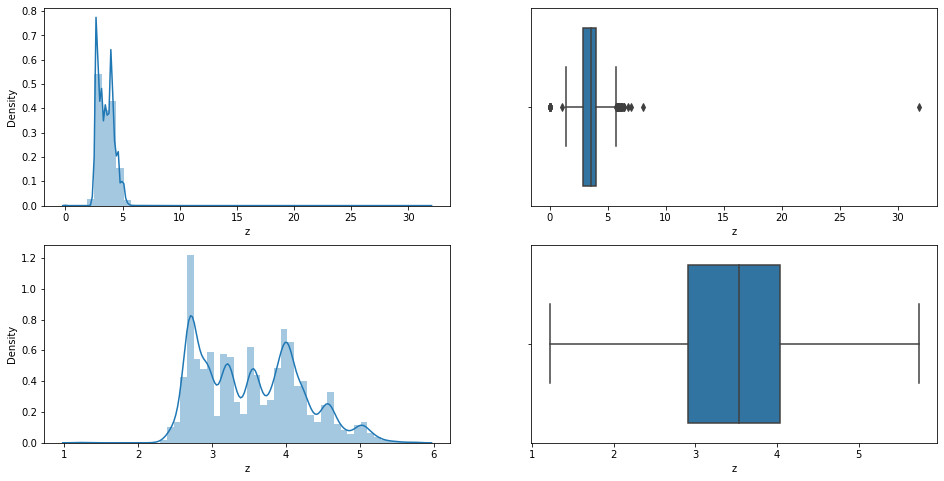

In [58]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df5['z'])

plt.subplot(2,2,2)
sns.boxplot(new_df5['z'])

plt.subplot(2,2,3)
sns.distplot(new_data['z'])

plt.subplot(2,2,4)
sns.boxplot(new_data['z'])

In [59]:
new_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


### Identify the Target Variable and Splitting the Data into Train and Test

In [60]:
y = new_data['price']
X = new_data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


### Separating Categorical and Numerical Columns:

In [62]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


In [63]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [64]:
#Scaling the Numerical Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
441,0.214095,-1.224846,0.725626,0.472926,0.447856,0.320670
50332,-0.201523,1.770066,-2.053709,-0.142889,-0.109638,0.060851
35652,-1.054631,0.745491,-0.200819,-1.249571,-1.278575,-1.194940
9439,0.235969,0.430237,0.725626,0.347978,0.393905,0.421711
15824,0.476590,-0.909592,2.115294,0.704972,0.681643,0.580489


In [65]:
X_train_num_rescaled.describe()

,carat,depth,table,x,y,z
count,4.045500e+04,4.045500e+04,4.045500e+04,4.045500e+04,4.045500e+04,4.045500e+04
mean,7.063933e-18,-2.964437e-16,-3.034445e-15,3.944057e-16,-6.067188e-17,3.304708e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.295252e+00,-2.367641e+00,-2.748543e+00,-3.360298e+00,-3.364679e+00,-3.352881e+00
25%,-8.577602e-01,-5.155245e-01,-6.640416e-01,-9.104263e-01,-9.099102e-01,-9.062528e-01
50%,-2.015225e-01,1.149833e-01,-2.008191e-01,-3.579096e-02,-1.971934e-02,-2.575515e-02
75%,5.422135e-01,5.878642e-01,7.256260e-01,7.228214e-01,7.266023e-01,7.248330e-01
max,2.642174e+00,2.361168e+00,2.810128e+00,3.172693e+00,3.181371e+00,3.171462e+00


### Applying Label Encoding on Categorical Columns

In [87]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
441
50332
35652
9439
15824


In [88]:
X_train_cat.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [89]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
441,5
50332,3
35652,4
9439,3
15824,2


In [90]:
X_train_cat.color.unique()

array(['H', 'D', 'G', 'F', 'I', 'E', 'J'], dtype=object)

In [91]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
441,5,3
50332,3,7
35652,4,4
9439,3,3
15824,2,5


In [92]:
X_train_cat.clarity.unique()

array(['SI2', 'SI1', 'VVS2', 'VS1', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [93]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
441,5,3,2
50332,3,7,3
35652,4,4,6
9439,3,3,5
15824,2,5,4


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [94]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.214095,-1.224846,0.725626,0.472926,0.447856,0.320670,5,3,2
50332,-0.201523,1.770066,-2.053709,-0.142889,-0.109638,0.060851,3,7,3
35652,-1.054631,0.745491,-0.200819,-1.249571,-1.278575,-1.194940,4,4,6
9439,0.235969,0.430237,0.725626,0.347978,0.393905,0.421711,3,3,5
15824,0.476590,-0.909592,2.115294,0.704972,0.681643,0.580489,2,5,4


### preparing test data

In [95]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
10176,1.10,Ideal,H,SI2,62.0,55.0,6.61,6.65,4.11
16083,1.29,Ideal,H,SI1,62.6,56.0,6.96,6.93,4.35
13420,1.20,Premium,I,SI1,61.1,58.0,6.88,6.80,4.18
20407,1.50,Ideal,F,SI1,60.9,56.0,7.43,7.36,4.50
8909,0.90,Very Good,F,VS2,61.7,57.0,6.17,6.21,3.82


In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 10176 to 40845
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


### Separating Categorical and Numerical Columns:

In [97]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,cut,color,clarity
10176,Ideal,H,SI2
16083,Ideal,H,SI1
13420,Premium,I,SI1
20407,Ideal,F,SI1
8909,Very Good,F,VS2


In [98]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
10176,1.10,62.0,55.0,6.61,6.65,4.11
16083,1.29,62.6,56.0,6.96,6.93,4.35
13420,1.20,61.1,58.0,6.88,6.80,4.18
20407,1.50,60.9,56.0,7.43,7.36,4.50
8909,0.90,61.7,57.0,6.17,6.21,3.82


In [ ]:
# rescaling the numerical features

In [99]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
10176,0.673461,0.193797,-1.127264,0.785295,0.825512,0.825874
16083,1.089078,0.666678,-0.664042,1.097665,1.077284,1.172299
13420,0.892207,-0.515525,0.262403,1.026266,0.960390,0.926914
20407,1.548445,-0.673151,-0.664042,1.517133,1.463932,1.388815
8909,0.235969,-0.042644,-0.200819,0.392602,0.429872,0.407276


In [101]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
10176
16083
13420
20407
8909


In [102]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
10176,4,3,2
16083,4,3,3
13420,5,2,3
20407,4,5,3
8909,3,5,4


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [103]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.673461,0.193797,-1.127264,0.785295,0.825512,0.825874,4,3,2
16083,1.089078,0.666678,-0.664042,1.097665,1.077284,1.172299,4,3,3
13420,0.892207,-0.515525,0.262403,1.026266,0.960390,0.926914,5,2,3
20407,1.548445,-0.673151,-0.664042,1.517133,1.463932,1.388815,4,5,3
8909,0.235969,-0.042644,-0.200819,0.392602,0.429872,0.407276,3,5,4


### Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [122]:
y_test_pred = lr.predict(X_test_transformed)

In [123]:
from sklearn import metrics

In [124]:
lr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
lr_mae

653.3792990141887

In [125]:
lr_mse = metrics.mean_squared_error(y_test, y_test_pred)
lr_mse

804268.4338260149

In [126]:
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
lr_rmse

896.8101436904105

In [127]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4984.253164
16083,6424.0,6842.885645
13420,5510.0,5851.731273
20407,8770.0,9080.220178
8909,4493.0,4625.422287


<AxesSubplot:xlabel='price', ylabel='Count'>

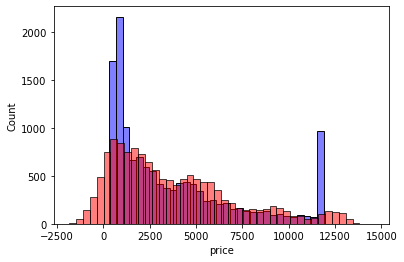

In [128]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### KNN Regression

In [129]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [130]:
y_test_pred = knn.predict(X_test_transformed)

In [131]:
knn_mae = metrics.mean_absolute_error(y_test, y_test_pred)
knn_mae

293.6718057100482

In [132]:
knn_mse = metrics.mean_squared_error(y_test, y_test_pred)
knn_mse

251715.8000503337

In [133]:
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
knn_rmse

501.71286613992044

In [134]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4539.000
16083,6424.0,6278.200
13420,5510.0,5180.800
20407,8770.0,11563.175
8909,4493.0,6015.200


<AxesSubplot:xlabel='price', ylabel='Count'>

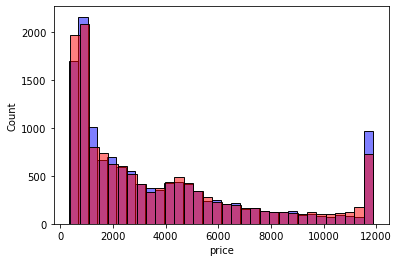

In [135]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Decision Tree Regression

In [136]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [137]:
y_test_pred = dtr.predict(X_test_transformed)

In [138]:
dt_mae = metrics.mean_absolute_error(y_test, y_test_pred)
dt_mae

264.4928531701891

In [139]:
dt_mse = metrics.mean_squared_error(y_test, y_test_pred)
dt_mse

254749.5497091676

In [140]:
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
dt_rmse

504.7272032585202

In [141]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4620.0
16083,6424.0,6946.0
13420,5510.0,5098.0
20407,8770.0,11817.0
8909,4493.0,4678.0


<AxesSubplot:xlabel='price', ylabel='Count'>

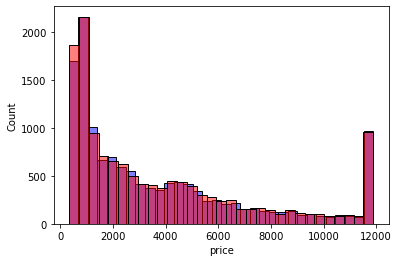

In [142]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Support vector regressor

In [143]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed, y_train)

SVR()

In [144]:
y_test_pred = svr.predict(X_test_transformed)

In [145]:
svr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
svr_mae

1131.842007668342

In [146]:
svr_mse = metrics.mean_squared_error(y_test, y_test_pred)
svr_mse

4091813.1272538775

In [147]:
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
svr_rmse

2022.8230588101069

In [148]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4567.229433
16083,6424.0,5460.719103
13420,5510.0,5022.006899
20407,8770.0,6159.596048
8909,4493.0,3818.436384


<AxesSubplot:xlabel='price', ylabel='Count'>

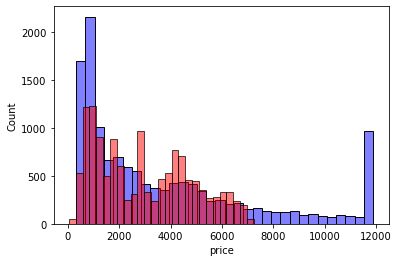

In [149]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Random Forest Regression

In [150]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [151]:
y_test_pred = rfr.predict(X_test_transformed)

In [152]:
rf_mae = metrics.mean_absolute_error(y_test, y_test_pred)
rf_mae

200.52142779719972

In [153]:
rf_mse = metrics.mean_squared_error(y_test, y_test_pred)
rf_mse

139288.7434165204

In [154]:
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rf_rmse

373.21407183615196

In [155]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4754.4800
16083,6424.0,7126.7700
13420,5510.0,5294.6800
20407,8770.0,11234.0775
8909,4493.0,4843.1600


<AxesSubplot:xlabel='price', ylabel='Count'>

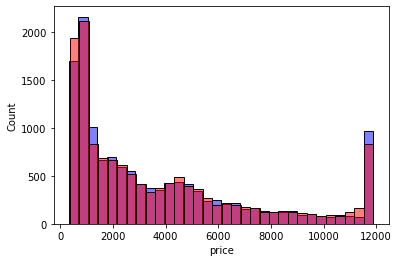

In [156]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### GradientBoostingRegressor

In [157]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [158]:
y_test_pred = gbr.predict(X_test_transformed)

In [159]:
gbr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
gbr_mae

263.4275721283635

In [160]:
gbr_mse = metrics.mean_squared_error(y_test, y_test_pred)
gbr_mse

193826.5223700651

In [161]:
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
gbr_rmse

440.25733653178924

In [162]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10176,4733.0,4370.980661
16083,6424.0,6706.149568
13420,5510.0,4721.453893
20407,8770.0,11020.197548
8909,4493.0,4463.247462


<AxesSubplot:xlabel='price', ylabel='Count'>

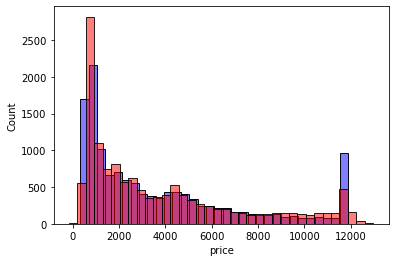

In [163]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [164]:
models = [('Linear Regression',lr_mae,lr_mse,lr_rmse),
          ('KNN Regression',knn_mae,knn_mse,knn_rmse),
          ('Decision Tree Regression',dt_mae,dt_mse,dt_rmse),
          ('Support Vector Regression',svr_mae,svr_mse,svr_rmse),
          ('Random Forest Regression',rf_mae,rf_mse,rf_rmse),
          ('Gradient Boosting Regression',gbr_mae,gbr_mse,gbr_rmse)]

In [165]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Mean absolute error','Mean squared error','Root mean squared error'])
predict.sort_values(by = 'Mean absolute error', ascending = True)

,Algorithm,Mean absolute error,Mean squared error,Root mean squared error
4,Random Forest Regression,200.521428,1.392887e+05,373.214072
5,Gradient Boosting Regression,263.427572,1.938265e+05,440.257337
2,Decision Tree Regression,264.492853,2.547495e+05,504.727203
1,KNN Regression,293.671806,2.517158e+05,501.712866
0,Linear Regression,653.379299,8.042684e+05,896.810144
3,Support Vector Regression,1131.842008,4.091813e+06,2022.823059


<AxesSubplot:xlabel='Mean absolute error', ylabel='Algorithm'>

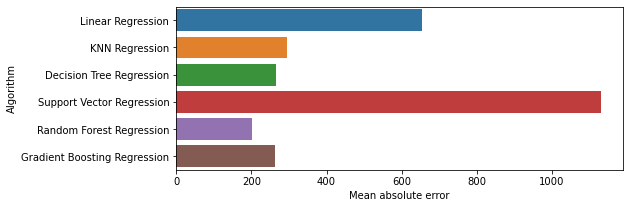

In [166]:
plt.figure(figsize = (8,3))
sns.barplot(x = predict['Mean absolute error'], y = predict['Algorithm'])

Conclusion:

In this project, by using a set of ML algorithms, a computational intelligence approach is applied to predict Diamond cost. This dataset was utilised for training and testing the Linear Regression, KNN Regressor, Support Vector Regression, GradientBoostingRegressor, Decision Tree and Random Forest Regressor, ML algorithms. The regression analysis of this dataset followed the steps of data splitting, preprocessing, Fitting the regression models, and evaluation. The resultant outcome revealed that Random Forest Regression achieved least error .